In [3]:
import pandas as pd
import seaborn as sns
import numpy as np


In [4]:
data=pd.read_csv('50_Startups.csv')

In [5]:

data.rename(columns={'Marketing Spend':'Marketingspend'},inplace=True)
data.rename(columns={'R&D Spend':'RDspend'},inplace=True)

In [6]:
data.head()

,RDspend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
data.drop(['State'],axis=1)

,RDspend,Administration,Marketingspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
X_df = data.loc[0:50,['RDspend','Administration','Marketingspend']]
Y_df = data.loc[0:50,['Profit']]


In [9]:
X_arr = np.array(X_df)
Y_arr = np.array(Y_df)

In [10]:
def normalizer(X_arr):
    n_col = X_arr.shape[1]
    mean_arr = np.mean(X_arr, axis = 0)
    std_arr = np.std(X_arr, axis = 0)
    X_copy = X_arr.copy()
    X_copy = ((X_copy - mean_arr) / std_arr)
    return X_copy 

In [11]:
      
X = normalizer(X_arr)
Y = Y_arr

In [23]:
m1 = 0
m2 = 0
c  = 0

L      = 0.01
epochs = 1000
n = len(X)

In [24]:

X1 = X[ : , 0]
X2 = X[ : , 1]

X1 = X1.reshape(50, 1)
X2= X2.reshape(50,1)
coef_list = [[],[],[]]
print(X1)
for i in range(epochs):
    Y_pred = m1*X1 + m2*X2 + c
    Y_pred = Y_pred.reshape(50,1)
    D_m1 = (-2/n) * sum(X1 * (Y - Y_pred))
    D_m2 = (-2/n) * sum(X2 * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    
    coef_list[0].append(float(m1))
    coef_list[1].append(float(m2))
    coef_list[2].append(float(c))
    
    print(f"m1 = {m1} ,m2 = {m2} ,c = {c}")
    
    m1 = m1 - L * D_m1
    m2 = m2 - L * D_m2
    c  = c  - L * D_c

[[ 2.01641149]
 [ 1.95586034]
 [ 1.75436374]
 [ 1.55478369]
 [ 1.5049372 ]
 [ 1.27980001]
 [ 1.34006641]
 [ 1.24505666]
 [ 1.03036886]
 [ 1.09181921]
 [ 0.62039825]
 [ 0.59308542]
 [ 0.44325987]
 [ 0.4020776 ]
 [ 1.01718075]
 [ 0.89791312]
 [ 0.0944412 ]
 [ 0.46072013]
 [ 0.39672494]
 [ 0.27944165]
 [ 0.05572609]
 [ 0.1027236 ]
 [ 0.00600658]
 [-0.13620072]
 [ 0.0731146 ]
 [-0.19931169]
 [ 0.0353702 ]
 [-0.03551899]
 [-0.16879272]
 [-0.17860854]
 [-0.25807437]
 [-0.27695823]
 [-0.22694868]
 [-0.40112892]
 [-0.60068212]
 [-0.60974994]
 [-0.99157015]
 [-0.65253231]
 [-1.17717755]
 [-0.77382036]
 [-0.98957702]
 [-1.00853372]
 [-1.10210556]
 [-1.28113364]
 [-1.13430539]
 [-1.60035036]
 [-1.59341322]
 [-1.62236202]
 [-1.61043334]
 [-1.62236202]]
m1 = 0 ,m2 = 0 ,c = 0
m1 = [776.39564105] ,m2 = [160.17616826] ,c = [2240.252784]
m1 = [1536.48826] ,m2 = [313.39175321] ,c = [4435.70051232]
m1 = [2280.63760029] ,m2 = [459.86485854] ,c = [6587.23928607]
m1 = [3009.19515504] ,m2 = [599.80748504] ,c

In [25]:
def error_calculator(coef_list, Y, X):
    X1 = X[ : , 0]
    X2 = X[ : , 1]
    X1 = X1.reshape(50, 1)
    X2= X2.reshape(50,1)
    error_list = []
    n = len(Y)
    
    
    for i in range(len(coef_list[1])):
        Y_pred = coef_list[0][i]*X1 + coef_list[1][i]*X2 + coef_list[2][i]
        error = (((Y - Y_pred)**2).sum())/n
        error_list.append(error)
        
    return error_list
        
error_list = error_calculator(coef_list, Y, X)  


<AxesSubplot: >

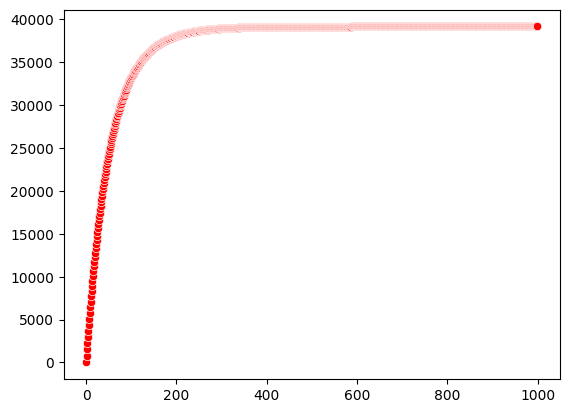

In [40]:
sns.scatterplot(coef_list[0],color="r")

<AxesSubplot: >

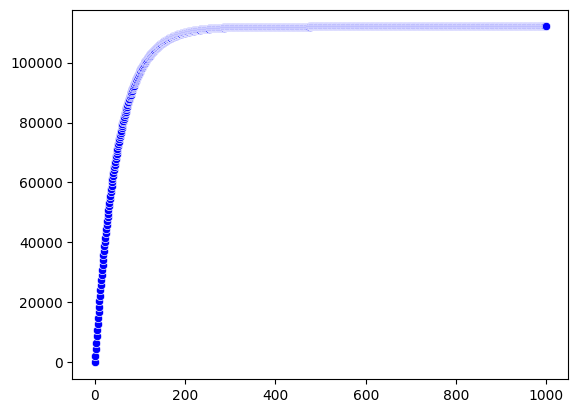

In [41]:
sns.scatterplot(coef_list[2],color="b")